In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('insurance_data.csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [8]:
df.shape

(1340, 11)

In [ ]:
df.isnull().sum()

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [11]:
col=list(df.columns)
col

['index',
 'PatientID',
 'age',
 'gender',
 'bmi',
 'bloodpressure',
 'diabetic',
 'children',
 'smoker',
 'region',
 'claim']

In [12]:
df = df.drop(['index'], axis=1)

In [13]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [14]:
df['gender'].value_counts()

male      670
female    662
Name: gender, dtype: int64

In [15]:
df['diabetic'].value_counts()

No     695
Yes    637
Name: diabetic, dtype: int64

In [16]:
df['region'].value_counts()

southeast    442
northwest    345
southwest    314
northeast    231
Name: region, dtype: int64

In [17]:
df['smoker'].value_counts()

No     1058
Yes     274
Name: smoker, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1332 non-null   int64  
 1   age            1332 non-null   float64
 2   gender         1332 non-null   object 
 3   bmi            1332 non-null   float64
 4   bloodpressure  1332 non-null   int64  
 5   diabetic       1332 non-null   object 
 6   children       1332 non-null   int64  
 7   smoker         1332 non-null   object 
 8   region         1332 non-null   object 
 9   claim          1332 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 114.5+ KB


In [26]:
col=list(df.columns)
col

['PatientID',
 'age',
 'gender',
 'bmi',
 'bloodpressure',
 'diabetic',
 'children',
 'smoker',
 'region',
 'claim']

In [19]:
df.corr()

,PatientID,age,bmi,bloodpressure,children,claim
PatientID,1.000000,-0.008705,0.119306,0.450759,0.120136,0.879392
age,-0.008705,1.000000,-0.042152,-0.060322,-0.026208,-0.028636
bmi,0.119306,-0.042152,1.000000,0.144977,0.013719,0.199945
bloodpressure,0.450759,-0.060322,0.144977,1.000000,-0.034356,0.531263
children,0.120136,-0.026208,0.013719,-0.034356,1.000000,0.064149
claim,0.879392,-0.028636,0.199945,0.531263,0.064149,1.000000


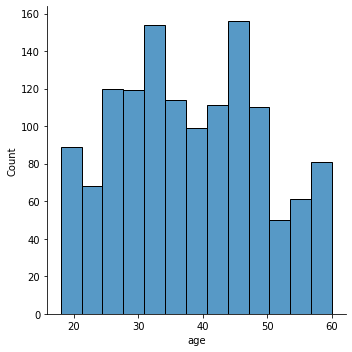

In [51]:
sns.displot(df, x="age")

In the above graph, we can analyse the distribution of Age column, and we can say that there are 140+ people who are having age 32 and 45 .

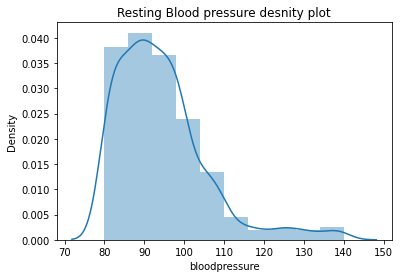

In [54]:
sns.distplot(df['bloodpressure'], bins=10)
plt.title('Resting Blood pressure desnity plot');

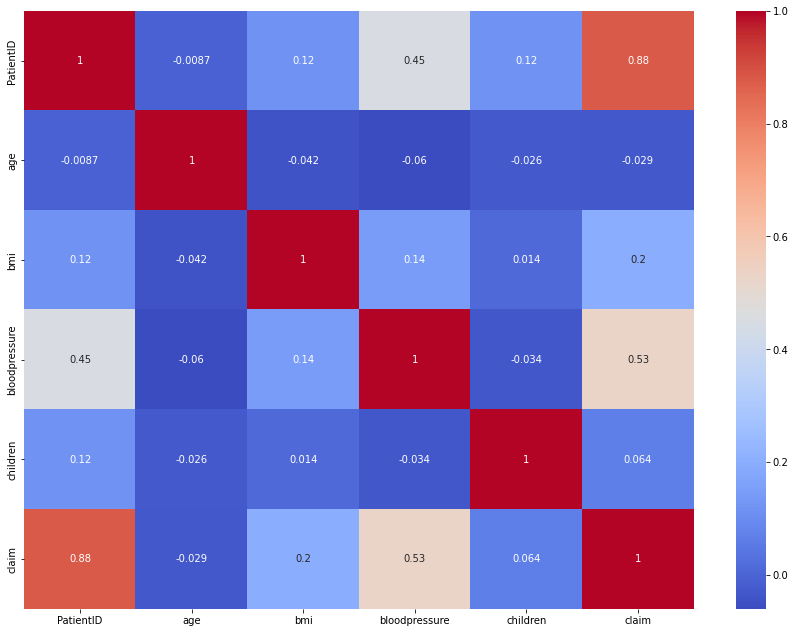

In [55]:
plt.figure(figsize = (15,11))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Count of people with feature by region')

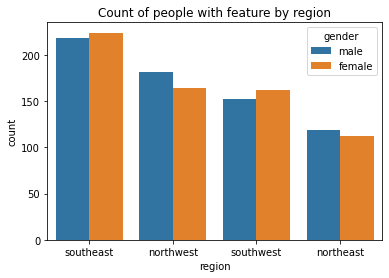

In [82]:
sns.countplot(x='region', hue='gender', data=df);
plt.title('Count of people with feature by region')

Text(0.5, 1.0, 'Count of people with smoke by region')

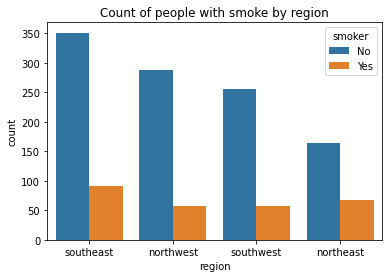

In [81]:
sns.countplot(x='region', hue='smoker', data=df);
plt.title('Count of people with smoke by region')

Text(0.5, 1.0, 'Count of people diabetic by region')

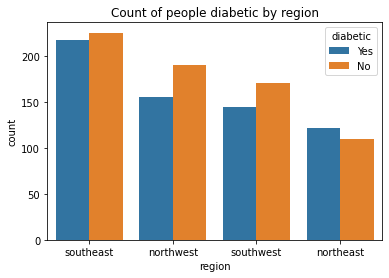

In [80]:
sns.countplot(x='region', hue='diabetic', data=df);
plt.title('Count of people diabetic by region')

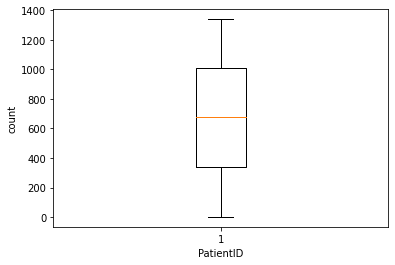

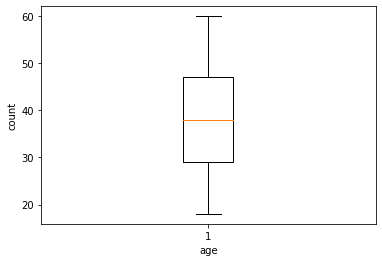

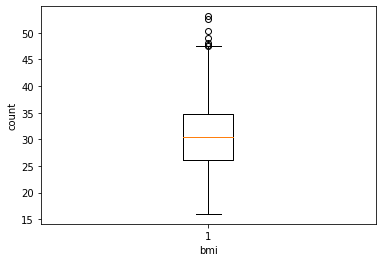

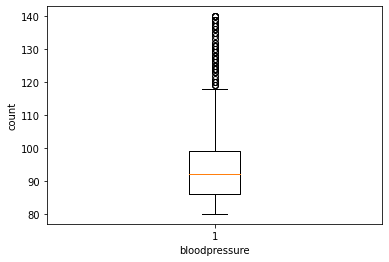

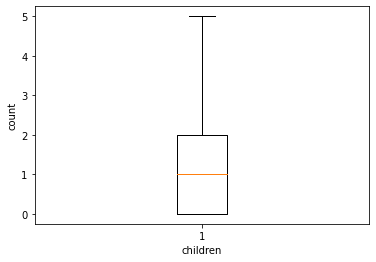

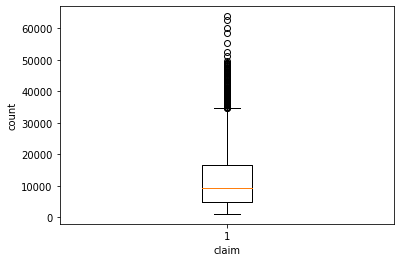

In [27]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

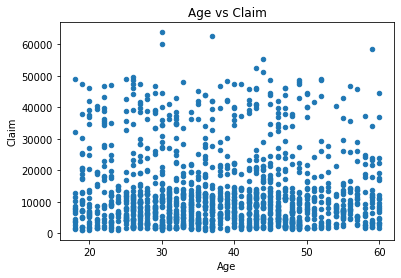

In [28]:
df.plot.scatter(x='age', y='claim', s=20)
plt.xlabel('Age')
plt.ylabel('Claim')
plt.title('Age vs Claim')
plt.show()

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'claim') ):#only num cols except for the dependent claim column.
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

         feature        VIF
0      PatientID   4.895801
1            age  10.791394
2            bmi  22.634199
3  bloodpressure  33.540169
4       children   1.833784


In [62]:
X = df[col_list]
X

,PatientID,age,bmi,bloodpressure,children
0,1,39.0,23.2,91,0
1,2,24.0,30.1,87,0
7,8,19.0,41.1,100,0
8,9,20.0,43.0,86,0
9,10,30.0,53.1,97,0
...,...,...,...,...,...
1335,1336,44.0,35.5,88,0
1336,1337,59.0,38.1,120,1
1337,1338,30.0,34.5,91,3
1338,1339,37.0,30.4,106,0


In [63]:
X.values

array([[1.00e+00, 3.90e+01, 2.32e+01, 9.10e+01, 0.00e+00],
       [2.00e+00, 2.40e+01, 3.01e+01, 8.70e+01, 0.00e+00],
       [8.00e+00, 1.90e+01, 4.11e+01, 1.00e+02, 0.00e+00],
       ...,
       [1.34e+03, 3.00e+01, 3.45e+01, 9.10e+01, 3.00e+00],
       [1.34e+03, 3.70e+01, 3.04e+01, 1.06e+02, 0.00e+00],
       [1.34e+03, 3.00e+01, 4.74e+01, 1.01e+02, 0.00e+00]])

In [64]:
X = df.loc[:,['PatientID','age','bmi','bloodpressure','children']].values
y = df.iloc[:, -1].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
lin_pred = regressor.predict(X_test)

In [36]:
from sklearn.metrics import *
r2_on_test=r2_score(y_test, lin_pred)
r2_on_test

0.8131661356961107

In [ ]:
# Our model here is predicting the values 81.31% times right with Linear Regression.

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [69]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [70]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[28476.73 27941.29]
 [ 6313.76  6334.34]
 [ 6455.86  6457.84]
 [ 3875.73  3877.3 ]
 [39836.52 39983.43]
 [ 2597.78  2639.04]
 [ 8068.19  8062.76]
 [11073.18 11090.72]
 [ 3761.29  3736.46]
 [ 5377.46  5375.04]
 [16776.3  16796.41]
 [ 3484.33  3490.55]
 [10923.93 10928.85]
 [ 6600.36  6640.54]
 [33732.69 33900.65]
 [11512.41 11454.02]
 [16586.5  16450.89]
 [ 2498.41  2497.04]
 [36197.7  36219.41]
 [ 1725.55  1727.54]
 [41034.22 40974.16]
 [18246.5  18310.74]
 [ 9722.77  9748.91]
 [ 1163.46  1241.57]
 [ 2196.47  2200.83]
 [ 1708.93  1708.  ]
 [ 1633.04  1633.96]
 [14451.84 14455.64]
 [14001.13 14007.22]
 [ 6123.57  6128.8 ]
 [ 2710.83  2719.28]
 [ 1737.38  1728.9 ]
 [35160.13 35069.37]
 [ 1737.38  1731.68]
 [ 4058.12  4074.45]
 [39597.41 39722.75]
 [ 6203.9   6198.75]
 [18903.49 19023.26]
 [ 6067.13  6082.41]
 [42124.52 41676.08]
 [17626.24 17904.53]
 [ 3044.21  3021.81]
 [ 6203.9   6272.48]
 [12475.35 12523.6 ]
 [21771.34 22144.03]
 [ 8310.84  8302.54]
 [ 7626.99  7537.16]
 [12643.38 12

In [72]:
r2_score(y_test, y_pred)

0.9997399320664014

In [ ]:
#Our model here is predicting the values 99.97% times right with Decesion Tree Regression.